# Análise Exploratória e Modelagem Preditiva para Preço de Diamantes

**Contexto:** O mercado de diamantes apresenta alta variabilidade de preços, influenciada por características físicas e qualitativas das gemas.

**Objetivo:** realizar uma Análise Exploratória de Dados (EDA) e desenvolver modelos de Machine Learning capazes de prever o preço dos diamantes (`price`).


## Descrição do Dataset

O dataset contém informações sobre diamantes, incluindo atributos físicos e qualitativos, além do preço.

**Principais variáveis:**
- carat, cut, color, clarity
- depth, table
- price


## Análise Exploratória de Dados (EDA)

Nesta etapa, são analisadas as distribuições das variáveis e suas relações com o preço.


## Pré-processamento dos Dados

- Tratamento de variáveis categóricas com One-Hot Encoding (OHE)
- Separação em conjuntos de treino e teste


## Modelagem Preditiva

Modelos avaliados:
- Regressão Linear
- Random Forest Regressor
- XGBoost Regressor


## Validação dos Modelos

Aplicação de K-Fold Cross-Validation para avaliação de desempenho.


Importação dos dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**SEMPRE** dê um head() para saber do que se trata os dados e principalmente cada coluna

Estes dados abordam sobre Diamantes e sua especifidades:
* Quilates
* Corte
* Cor
Sim! Diamante possui colorações diferentes 😯

D–F → Incolor

G–J → Quase incolor

K–M → Levemente amarelado

N–Z → Coloração amarela ou marrom perceptível
* Grau de Pureza, quanto mais puro, mais caro

FL (Flawless) – Sem inclusões ou imperfeições visíveis sob ampliação de 10x.

IF (Internally Flawless) – Sem inclusões internas, apenas pequenas marcas superficiais.

VVS1 / VVS2 (Very Very Slightly Included) – Inclusões extremamente pequenas, difíceis de ver até com lupa de 10x.

VS1 / VS2 (Very Slightly Included) – Inclusões pequenas, visíveis com lupa mas não a olho nu.

SI1 / SI2 (Slightly Included) – Inclusões mais visíveis sob ampliação, podendo ser percebidas a olho nu em alguns casos.

I1 / I2 / I3 (Included) – Inclusões visíveis a olho nu, que podem afetar brilho e durabilidade.

* A Profundidade em relação ao diâmetro médio, os melhores diamantes possui 59% e 62,5%

* O Table é a parte plana do diamante, os melhores diamantes normalmente fica entre 54% e 57%

* Preço

* x = comprimento

* y = largura

* z = Profundidade

Muito importante: Dois diamantes com o mesmo peso em quilates podem ter valores muito diferentes se um tiver melhor lapidação, cor ou pureza que o outro.

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Fazendo o Describe das colunas

In [ ]:
# Cálculo da média (aritmética) da variável price na populução
df[['price']].mean()

,0
price,3932.799722


In [ ]:
#Calcular a mediana do preço
df[['price']].median()

,0
price,2401.0


In [ ]:
#calcular o maior preço
df[['price']].max()

,0
price,18823


In [ ]:
#calcular o menor preço
df[['price']].min()

,0
price,326


In [ ]:
df[['carat']].mean()


,0
carat,0.79794


In [ ]:
# Cálculo da desvio padrão da variável price na população
df[['price']].std()

,0
price,3989.439738


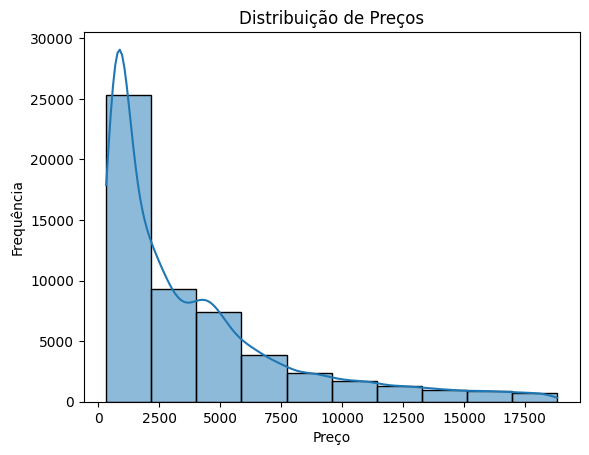

In [ ]:
# Representação da distribuição de dados: histograma

import matplotlib.pyplot as plt

sns.histplot(data=df, x="price", bins = 10, kde=True)


plt.title("Distribuição de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

Mas por que isso acontece? Possui N fatores que citei no começo, corte,profundidade, table,etc


In [ ]:
# Amostra de 3000 linhas
a1 = df.iloc[3000:5999, :]
a1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
3000,3001,0.70,Ideal,G,VVS1,60.7,57.0,3303,5.73,5.76,3.49
3001,3002,0.77,Ideal,E,VS2,61.0,56.0,3303,5.91,5.96,3.62
3002,3003,0.81,Ideal,F,SI2,62.1,56.0,3303,5.95,6.00,3.71
3003,3004,0.71,Ideal,E,VS2,62.1,55.0,3304,5.72,5.75,3.56
3004,3005,0.71,Ideal,E,VS2,62.0,56.0,3304,5.72,5.75,3.55


'Escolher aleatoriamente' estes dados não é a melhor prática porque querendo ou não meio que você está manipulando os dados. Um viés involuntário

In [ ]:
# Estatísticas descritivas da amostra
a1[['price']].mean()

,0
price,3324.236746


In [ ]:
a1[['price']].median()

,0
price,3601.0


In [ ]:
a1[['price']].std()

,0
price,941.000147


array([[<Axes: title={'center': 'price'}>]], dtype=object)

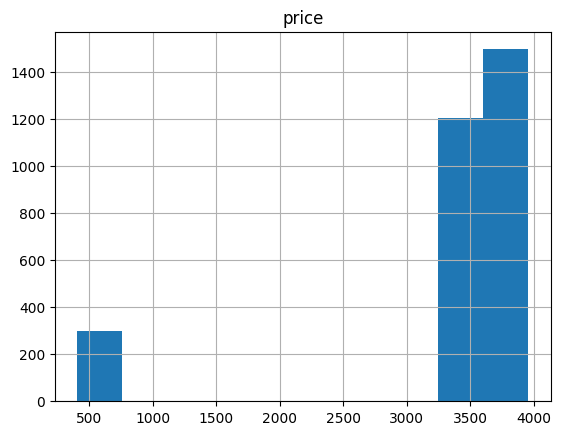

In [ ]:
a1[['price']].hist()

Viu? O gráfico está totalmente inviésado, NÃO PODE! Mas como podemos fazer com que a amostra não seja inviésada?

Simples! Possui uma função chamada 'sample' , na qual escolhe aleatóriamente os dados. SEM ter inviésamento dos dados. Ele seleciona linhas aleatóriamente.

In [ ]:
# Geração de amostra aleatória
a3 = df.sample(600)
a3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
3789,3790,0.73,Ideal,F,VVS2,61.7,54.0,3463,5.82,5.76,3.57
43442,43443,0.50,Premium,E,SI1,62.3,58.0,1415,5.15,5.09,3.19
8302,8303,1.00,Good,F,SI2,60.2,65.0,4386,6.38,6.41,3.85
42145,42146,0.51,Ideal,G,SI1,61.6,56.0,1281,5.19,5.14,3.18
36450,36451,0.31,Premium,D,VS2,61.2,59.0,942,4.37,4.32,2.66


In [ ]:
a3[['price']].mean()

,0
price,3794.653333


In [ ]:
df[['price']].mean()

,0
price,3932.799722


In [ ]:
a3[['price']].median()

,0
price,2345.5


In [ ]:
df[['price']].median()

,0
price,2401.0


In [ ]:
df[['price']].mean()

,0
price,3932.799722


In [ ]:
df[['price']].median()

,0
price,2401.0


array([[<Axes: title={'center': 'price'}>]], dtype=object)

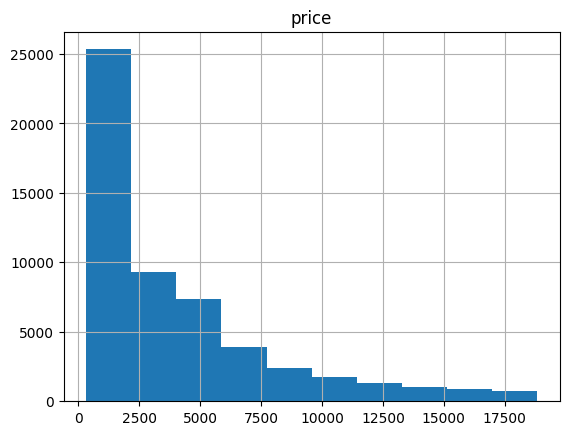

In [ ]:
df[['price']].hist()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

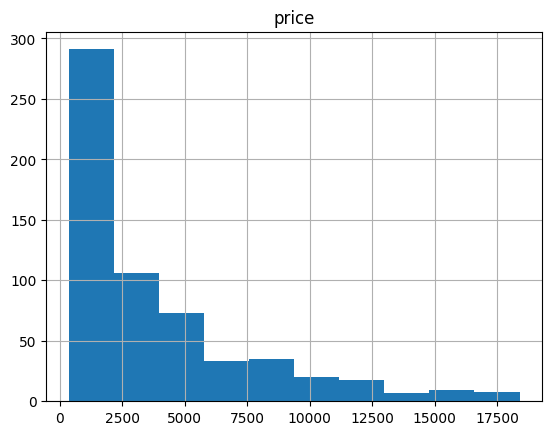

In [ ]:
a3[['price']].hist()

In [ ]:
# Cálculo de decis ou percentis
df[['price']].quantile(np.arange(0,1,.1))

,price
0.0,326.0
0.1,646.0
0.2,837.0
0.3,1087.0
0.4,1698.0
0.5,2401.0
0.6,3465.0
0.7,4662.0
0.8,6301.2
0.9,9821.0


In [ ]:
a3[['price']].quantile(np.arange(0,1,.1))

,price
0.0,363.0
0.1,647.9
0.2,838.8
0.3,1029.5
0.4,1589.8
0.5,2345.5
0.6,3241.0
0.7,4393.3
0.8,6142.2
0.9,9551.5


<Axes: xlabel='color'>

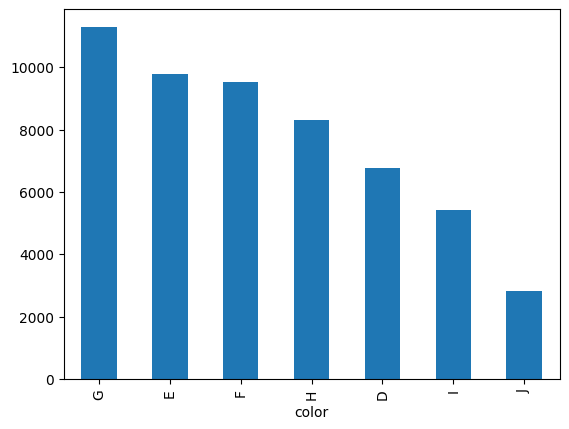

In [ ]:
# Distribuição de variável categórica na população
df['color'].value_counts().plot(kind='bar')

<Axes: xlabel='cut'>

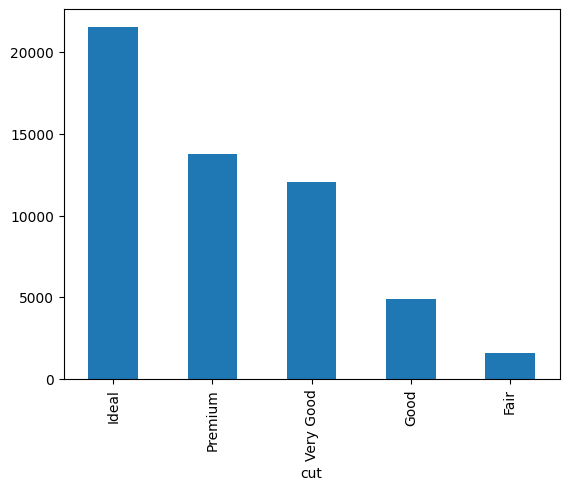

In [ ]:
df['cut'].value_counts().plot(kind = 'bar')


<Axes: xlabel='clarity'>

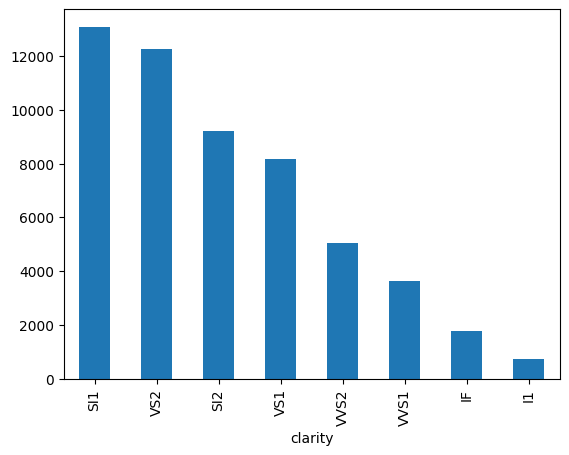

In [ ]:
df['clarity'].value_counts().plot(kind='bar')

Se a população é N = 53.940 e a amostra é n = 600: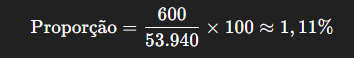

* Interpretação:

1,1% da população é uma amostra pequena em termos proporcionais.

Isso não significa automaticamente que é ruim, mas aumenta a chance de:

* Erro amostral mais alto.

* Não representatividade, especialmente se os dados não forem homogêneos.

* Influência maior de outliers na média.

💡 Para melhorar a confiança:

Usar amostragem estratificada para garantir que todas as categorias (cut, color, clarity, faixas de carat) estejam representadas proporcionalmente.

* Aumentar o tamanho da amostra se possível — mesmo 5% (~2.700 registros) já reduziria muito o erro.

* Calcular o erro padrão para saber quão confiável é a média da amostra em relação à população.


In [ ]:
aS = df.sample(2700)

aS.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1769,1770,0.91,Premium,G,SI2,60.1,62.0,3047,6.24,6.20,3.73
48343,48344,0.56,Ideal,H,VVS1,62.1,53.8,1961,5.27,5.33,3.29
47243,47244,0.62,Premium,G,VS2,61.1,59.0,1841,5.56,5.50,3.38
11526,11527,1.32,Premium,E,I1,62.2,58.0,5027,7.05,6.97,4.36
48376,48377,0.63,Ideal,D,SI1,61.5,56.0,1964,5.52,5.53,3.40


In [ ]:
aS.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,26341.870000,0.800385,61.713963,57.476444,3962.248889,5.738996,5.739915,3.541733
std,15535.911561,0.477005,1.565893,2.206352,3990.196223,1.125081,1.115978,0.693137
min,40.000000,0.230000,43.000000,51.000000,364.000000,3.880000,3.920000,2.250000
25%,12625.250000,0.400000,61.000000,56.000000,957.000000,4.710000,4.710000,2.910000
50%,25971.000000,0.710000,61.800000,57.000000,2484.000000,5.700000,5.720000,3.530000
75%,39898.250000,1.030000,62.500000,59.000000,5293.750000,6.532500,6.530000,4.030000
max,53935.000000,3.220000,79.000000,73.000000,18710.000000,9.490000,9.420000,5.920000


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<Axes: title={'center': 'price'}>]], dtype=object)

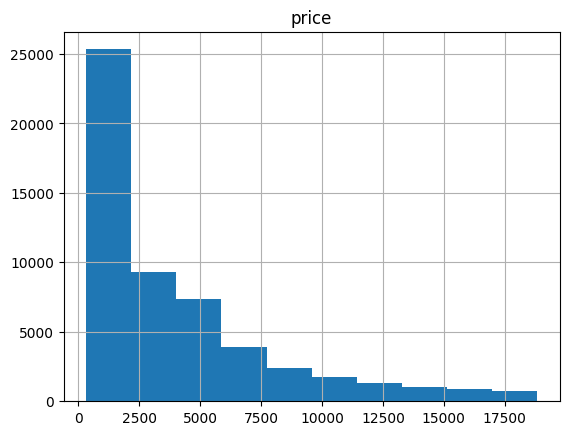

In [ ]:
df[['price']].hist()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

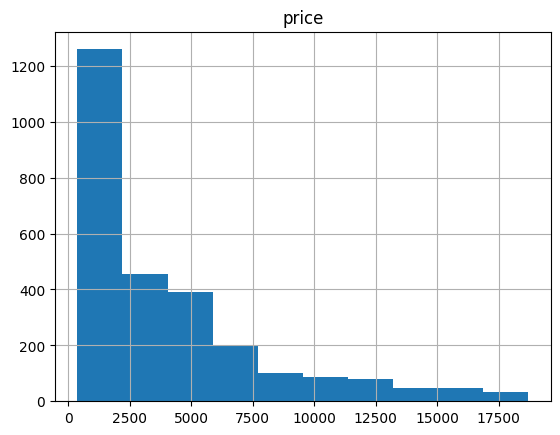

In [ ]:
aS[['price']].hist()

In [ ]:
aS[['color']].mode()

,color
0,G


A cor G é a Moda,ou seja é o que possui maior frequência

<Axes: xlabel='color'>

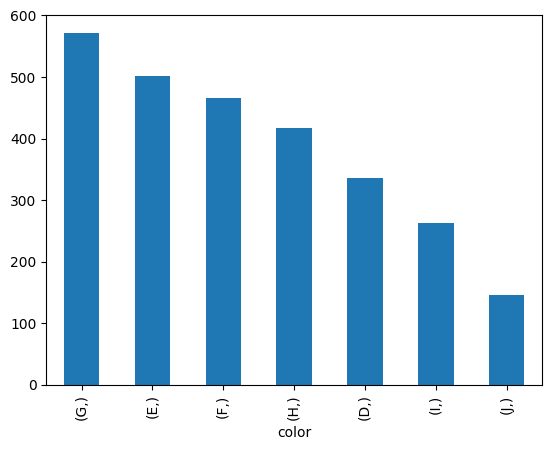

In [ ]:
aS[['color']].value_counts().plot(kind='bar')

In [ ]:
aS.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,26341.870000,0.800385,61.713963,57.476444,3962.248889,5.738996,5.739915,3.541733
std,15535.911561,0.477005,1.565893,2.206352,3990.196223,1.125081,1.115978,0.693137
min,40.000000,0.230000,43.000000,51.000000,364.000000,3.880000,3.920000,2.250000
25%,12625.250000,0.400000,61.000000,56.000000,957.000000,4.710000,4.710000,2.910000
50%,25971.000000,0.710000,61.800000,57.000000,2484.000000,5.700000,5.720000,3.530000
75%,39898.250000,1.030000,62.500000,59.000000,5293.750000,6.532500,6.530000,4.030000
max,53935.000000,3.220000,79.000000,73.000000,18710.000000,9.490000,9.420000,5.920000


Bora começar a usar Regressão Linear

Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Escolhendo as variáveis

In [ ]:
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

Separar treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Criar e treinar o modelo

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

Fazer Previsões

In [ ]:
y_pred = modelo.predict(X_test)

Avaliar o modelo

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 1497.3906985438382
R²: 0.8589542625888938


Interpretar coeficientes

In [ ]:
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
})
print(coeficientes)


  Variável   Coeficiente
0    carat  10683.184260
1    depth   -204.099553
2    table   -104.267369
3        x  -1286.799574
4        y     37.632521
5        z     53.394864


Coeficiente positivo → aumento dessa variável tende a aumentar o preço.

Coeficiente negativo → aumento dessa variável tende a reduzir o preço.

Ou seja, os diamantes mais caros possui quilates, Largura e Profundidades maiores. Quanto maior essas categórias mais caro é!

E o preço do diamante fica mais barato não só nos fatores acima serem menores mas principalmente pela profundidade , a base do diamante e o comprimento

**MAS** , tem como melhorarmos ainda mais a nossa modelagem
* Incluir variáveis categóricas (cut, color, clarity) com One-Hot Encoding (pd.get_dummies()).

* Testar transformações logarítmicas em variáveis muito assimétricas.

* Usar validação cruzada para avaliar estabilidade do modelo.

# 📌 O que é One-Hot Encoding

É um método para transformar variáveis categóricas em colunas binárias (0/1).

Para cada categoria, criamos uma nova coluna:

1 se o registro pertence àquela categoria.

0 caso contrário.

Isso evita que o modelo interprete um rótulo como uma escala numérica (por exemplo, pensar que "color G" é “maior” que "color D").

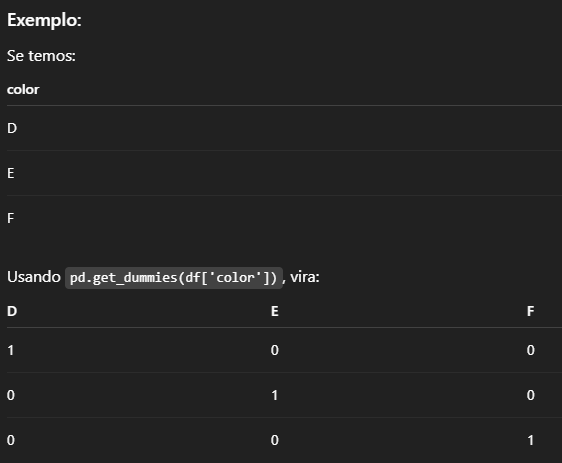

In [ ]:
# Exemplo simples
df = pd.DataFrame({'color': ['D', 'E', 'F', 'D']})

df_encoded = pd.get_dummies(df['color'], prefix='color')
print(df_encoded)

   color_D  color_E  color_F
0     True    False    False
1    False     True    False
2    False    False     True
3     True    False    False


In [ ]:
# Aplicar One-Hot Encoding
from math import sqrt

aS_encoded = pd.get_dummies(aS, columns=['cut', 'color', 'clarity'], drop_first=True)

X_all = aS_encoded.drop('price', axis=1)
y = aS_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

modelo_all = LinearRegression()
modelo_all.fit(X_train, y_train)

y_pred_all = modelo_all.predict(X_test)

# Cálculo do RMSE na versão antiga do scikit-learn
rmse_all = sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)

print("\n📊 Modelo com categóricas (One-Hot)")
print("RMSE:", rmse_all)
print("R²:", r2_all)


📊 Modelo com categóricas (One-Hot)
RMSE: 1187.5204484499754
R²: 0.9180375051805673


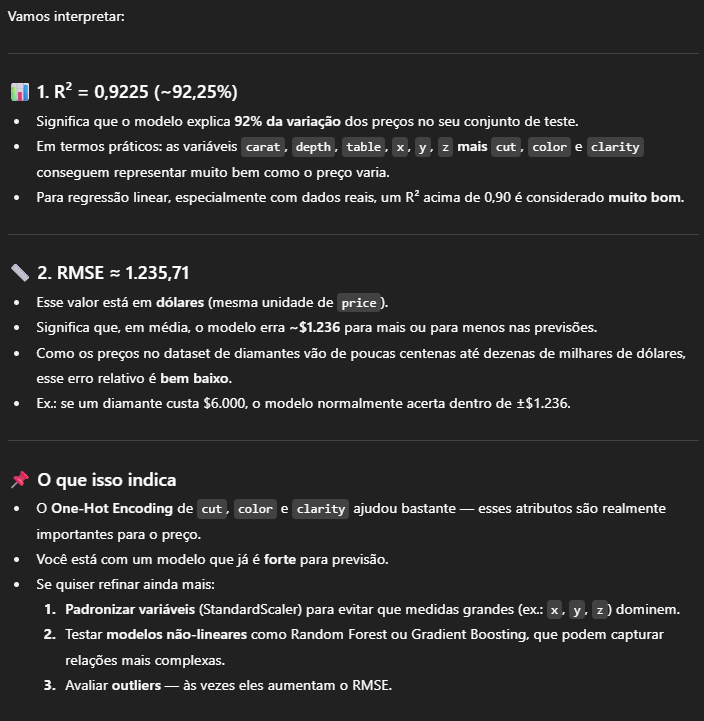

# Antes e Depois da implementação do One-Hot Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd

# ===== Modelo 1: Só variáveis numéricas =====
X_num = aS[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = aS['price']

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

modelo_num = LinearRegression()
modelo_num.fit(X_train, y_train)

y_pred_num = modelo_num.predict(X_test)

rmse_num = sqrt(mean_squared_error(y_test, y_pred_num))
r2_num = r2_score(y_test, y_pred_num)

# ===== Modelo 2: Com variáveis categóricas (One-Hot) =====
aS_encoded = pd.get_dummies(aS, columns=['cut', 'color', 'clarity'], drop_first=True)

X_all = aS_encoded.drop('price', axis=1)
y_all = aS_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

modelo_all = LinearRegression()
modelo_all.fit(X_train, y_train)

y_pred_all = modelo_all.predict(X_test)

rmse_all = sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)

# ===== Comparação final =====
resultado = pd.DataFrame({
    'Modelo': ['Somente numéricas', 'Numéricas + categóricas (One-Hot)'],
    'R²': [r2_num, r2_all],
    'RMSE': [rmse_num, rmse_all]
})

print(resultado)


                              Modelo        R²         RMSE
0                  Somente numéricas  0.853770  1586.176056
1  Numéricas + categóricas (One-Hot)  0.918038  1187.520448


O R² subiu → mais variação explicada pelo modelo.

O RMSE caiu → erro médio menor nas previsões.

Ou seja, nosso modelo ficou mais preciso!

Tentando aprimorar mais ainda!


In [ ]:
# (Opcional, mas recomendado) Remover linhas com NaN nas colunas que vamos usar
cols_needed = ['price','carat','depth','table','x','y','z','cut','color','clarity']
aS = aS.dropna(subset=[c for c in cols_needed if c in aS.columns]).copy()

# (Opcional) Filtrar registros claramente inválidos (alguns datasets têm x,y,z = 0)
if {'x','y','z'}.issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

O que está acontecendo aqui?

dropna(...): evita que o modelo quebre por causa de valores ausentes.

Filtro de x,y,z: tira medidas físicas impossíveis (0 mm) que atrapalham a regressão.

1) Modelo só com variáveis numéricas (baseline)

In [ ]:
# 1.1) Seleciona features numéricas e alvo
X_num = aS[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = aS['price']

# 1.2) Separa treino e teste (80%/20%)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    X_num, y, test_size=0.20, random_state=42
)

# 1.3) Cria e treina o modelo de Regressão Linear
modelo_num = LinearRegression()
modelo_num.fit(Xn_train, yn_train)

# 1.4) Faz previsões no conjunto de teste
yn_pred = modelo_num.predict(Xn_test)

# 1.5) Avalia com RMSE e R²
rmse_num = sqrt(mean_squared_error(yn_test, yn_pred))   # RMSE (erro médio em dólares)
r2_num = r2_score(yn_test, yn_pred)                     # R² (variação explicada)

print("📊 [Etapa 1] Modelo só numérico")
print("RMSE:", rmse_num)
print("R²:", r2_num)


📊 [Etapa 1] Modelo só numérico
RMSE: 1586.1760563066832
R²: 0.8537702439394022


Explicação passo a passo:

1.1 Definimos X (explicativas) e y (alvo). Aqui usamos só numéricas para ter um baseline.

1.2 train_test_split cria dois conjuntos: o modelo aprende em treino e é avaliado em teste (dados “novos”).

1.3 LinearRegression() ajusta uma equação linear que relaciona as features ao preço.

1.4 predict calcula o preço previsto para os dados de teste.

1.5 RMSE mede o erro médio em dólares (quanto menor, melhor). R² mede a fração da variação explicada (quanto maior, melhor).

2) Modelo com categóricas via One-Hot Encoding

In [ ]:
# 2.1) One-Hot nas colunas categóricas; drop_first=True evita redundância perfeita
aS_enc = pd.get_dummies(aS, columns=['cut','color','clarity'], drop_first=True)

# 2.2) Define X e y novamente (agora com dummies)
X_all = aS_enc.drop('price', axis=1)
y_all = aS_enc['price']

# 2.3) Split treino/teste
Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    X_all, y_all, test_size=0.20, random_state=42
)

# 2.4) Treina o modelo
modelo_all = LinearRegression()
modelo_all.fit(Xa_train, ya_train)

# 2.5) Previsões e métricas
ya_pred = modelo_all.predict(Xa_test)

rmse_all = sqrt(mean_squared_error(ya_test, ya_pred))
r2_all = r2_score(ya_test, ya_pred)

print("\n📊 [Etapa 2] Modelo com categóricas (One-Hot)")
print("RMSE:", rmse_all)
print("R²:", r2_all)



📊 [Etapa 2] Modelo com categóricas (One-Hot)
RMSE: 1187.5204484499754
R²: 0.9180375051805673


O que é e o que acontece aqui:

One-Hot Encoding transforma categorias (cut, color, clarity) em colunas 0/1. Ex.: color_G=1 se a cor é G, senão 0.

drop_first=True remove uma coluna por grupo para evitar multicolinearidade perfeita (as demais já carregam toda a informação necessária).

O modelo agora “enxerga” a qualidade do corte/cor/clareza, que são fatores muito relevantes no preço — por isso R² tende a subir e RMSE a cair.

3) Comparação lado a lado + melhoria percentual

In [ ]:
# 3.1) Tabela comparando os dois modelos
comparacao = pd.DataFrame({
    'Modelo': ['Somente numéricas', 'Numéricas + categóricas (One-Hot)'],
    'R²': [r2_num, r2_all],
    'RMSE': [rmse_num, rmse_all]
})

# 3.2) Cálculo de ganhos
delta_r2 = r2_all - r2_num
rmse_gain_pct = (rmse_num - rmse_all) / rmse_num * 100 if rmse_num > 0 else float('nan')

print("\n📌 [Etapa 3] Comparação")
print(comparacao)
print(f"\nΔ R² (ganho absoluto): {delta_r2:.4f}")
print(f"Redução de RMSE: {rmse_gain_pct:.2f}%")



📌 [Etapa 3] Comparação
                              Modelo        R²         RMSE
0                  Somente numéricas  0.853770  1586.176056
1  Numéricas + categóricas (One-Hot)  0.918038  1187.520448

Δ R² (ganho absoluto): 0.0643
Redução de RMSE: 25.13%


Validação cruzada (K-Fold) — para avaliar seu modelo de forma mais robusta.

Comparar Regressão Linear x Random Forest — ambos dentro de um pipeline com One-Hot Encoding, sem vazamento de dados.

Além do código, vou explicar passo a passo o que está acontecendo em cada etapa.

1) Preparação: por que usar Pipeline + ColumnTransformer?

Quando fazemos validação cruzada, os dados são divididos em K pastas (folds). Para evitar vazamento de dados (aprender informações do teste na etapa de preparo), todo pré-processamento (ex.: One-Hot Encoding) deve acontecer dentro do pipeline, após o split em cada dobra.

O que vamos fazer:

Separar features numéricas e categóricas.

Usar OneHotEncoder(handle_unknown='ignore') para cut, color, clarity.

Passar numéricas “como estão” (ou você pode usar StandardScaler, se quiser).

Criar dois pipelines:

pipe_lr → Regressão Linear

pipe_rf → Random Forest Regressor

In [ ]:
# Modelagem e métricas
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Pré-processamento e pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  # Se não tiver, ver fallback mais abaixo
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# =============== 0) Limpeza rápida recomendada ===============
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_presentes = [c for c in cols if c in aS.columns]
aS = aS.dropna(subset=cols_presentes).copy()
if set(['x','y','z']).issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

# =============== 1) Listas de features ===============
num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS.columns]

X = aS[num_cols + cat_cols]
y = aS['price']

# =============== 2) Transformações por tipo de dado ===============
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

# =============== 3) Definição dos pipelines ===============
pipe_lr = Pipeline(steps=[
    ('prep', preprocess),
    ('model', LinearRegression())
])

pipe_rf = Pipeline(steps=[
    ('prep', preprocess),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# =============== 4) Validação Cruzada (K-Fold) ===============
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Usaremos duas métricas: R² e MSE (depois tiramos a raiz para RMSE)
scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error'}

res_lr = cross_validate(pipe_lr, X, y, cv=cv, scoring=scoring, return_train_score=False)
res_rf = cross_validate(pipe_rf, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Converter MSE negativo em RMSE positivo por dobra
rmse_lr_folds = [sqrt(-m) for m in res_lr['test_mse']]
rmse_rf_folds = [sqrt(-m) for m in res_rf['test_mse']]

# Médias e desvios
lr_r2_mean, lr_r2_std = np.mean(res_lr['test_r2']), np.std(res_lr['test_r2'])
rf_r2_mean, rf_r2_std = np.mean(res_rf['test_r2']), np.std(res_rf['test_r2'])

lr_rmse_mean, lr_rmse_std = np.mean(rmse_lr_folds), np.std(rmse_lr_folds)
rf_rmse_mean, rf_rmse_std = np.mean(rmse_rf_folds), np.std(rmse_rf_folds)

print("===== Validação Cruzada (5-Fold) =====")
print(f"Linear Regression  -> R²: {lr_r2_mean:.4f} ± {lr_r2_std:.4f} | RMSE: {lr_rmse_mean:.2f} ± {lr_rmse_std:.2f}")
print(f"Random Forest      -> R²: {rf_r2_mean:.4f} ± {rf_r2_std:.4f} | RMSE: {rf_rmse_mean:.2f} ± {rf_rmse_std:.2f}")

# =============== 5) Hold-out (opcional) para comparar com seu resultado anterior ===============
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

y_pred_lr = pipe_lr.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)

rmse_lr_hold = sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr_hold = r2_score(y_test, y_pred_lr)

rmse_rf_hold = sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf_hold = r2_score(y_test, y_pred_rf)

print("\n===== Hold-out (20% teste) =====")
print(f"Linear Regression  -> R²: {r2_lr_hold:.4f} | RMSE: {rmse_lr_hold:.2f}")
print(f"Random Forest      -> R²: {r2_rf_hold:.4f} | RMSE: {rmse_rf_hold:.2f}")


===== Validação Cruzada (5-Fold) =====
Linear Regression  -> R²: 0.9187 ± 0.0011 | RMSE: 1133.49 ± 53.90
Random Forest      -> R²: 0.9564 ± 0.0053 | RMSE: 829.87 ± 72.95

===== Hold-out (20% teste) =====
Linear Regression  -> R²: 0.9174 | RMSE: 1191.98
Random Forest      -> R²: 0.9460 | RMSE: 964.04


O que está acontecendo (passo a passo)

A) K-Fold Cross-Validation

O que é: divide os dados em K partes (aqui, 5).

Como funciona: em cada rodada, treina com 4 partes e testa na 1 parte restante, alternando; no final, tira a média das métricas.

Por que usar: dá uma estimativa mais estável da performance, reduzindo a dependência de um único split.

No código:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cross_validate(...) roda o pipeline inteiro dentro de cada dobra (incluindo One-Hot), evitando vazamento.

scoring: pedimos r2 e neg_mean_squared_error (negativo por convenção do sklearn).

Convertemos MSE → RMSE com sqrt(-m) por dobra e depois calculamos média e desvio-padrão.

Interpretação:

R² (média ± desvio): quanta variação é explicada, em média, pelos modelos nas dobras.

RMSE (média ± desvio): erro médio (em $), com variação entre dobras.

B) Por que Random Forest além da Regressão Linear?

Regressão Linear: modela relações lineares entre features e preço. Fácil de interpretar (coeficientes).

Random Forest: um conjunto de árvores de decisão. Captura não linearidades e interações sem que você precise criar termos polinomiais ou features manuais.

Espera-se (no dataset de diamantes):

RF muitas vezes melhora o RMSE e/ou o R², principalmente por capturar relações mais complexas entre carat, proporções (depth, table) e as categorias.

In [ ]:
# Importâncias (Random Forest)
rf_model = pipe_rf.named_steps['model']
pre = pipe_rf.named_steps['prep']

# Nomes das colunas após o One-Hot:
cat_feature_names = list(pre.named_transformers_['cat'].get_feature_names_out(cat_cols))
feature_names = num_cols + cat_feature_names

importances = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nTop 15 importâncias (Random Forest):")
print(importances.head(15))

# Coeficientes (Linear)
lr_model = pipe_lr.named_steps['model']
coefs = pd.Series(lr_model.coef_, index=feature_names).sort_values(key=abs, ascending=False)
print("\nTop 15 coeficientes absolutos (Linear):")
print(coefs.head(15))



Top 15 importâncias (Random Forest):
y               0.713588
x               0.072685
carat           0.071197
z               0.048148
clarity_VVS2    0.017913
clarity_I1      0.009296
clarity_IF      0.008364
depth           0.006529
clarity_SI2     0.006263
clarity_VVS1    0.005427
color_J         0.004624
clarity_VS1     0.004302
clarity_VS2     0.004179
clarity_SI1     0.004161
color_F         0.004158
dtype: float64

Top 15 coeficientes absolutos (Linear):
carat           11642.547707
clarity_I1      -3388.783139
x               -2137.887205
y                1903.380632
z               -1613.200249
clarity_IF       1591.347574
color_J         -1456.009875
clarity_VVS2     1167.826759
clarity_SI2     -1114.455764
clarity_VVS1      916.145813
color_D           826.768225
clarity_VS1       654.582685
color_I          -600.848047
color_F           580.853260
color_E           523.787250
dtype: float64


Random Forest — importances: mostram quais features mais reduzem o erro nas árvores (não são “coeficientes” no sentido linear).

Linear — coeficientes: indicam o efeito linear esperado no preço (cuidado com escalas e multicolinearidade).

1️⃣ Validação cruzada (5-Fold)

Modelo	R² médio ± desvio	  -----    RMSE médio ± desvio

Linear Regression	0.9258 ± 0.0103	----- 1101.84 ± 116.18

Random Forest	0.9608 ± 0.0062	----- 800.99 ± 103.87

O que significa:

Linear Regression já está muito forte (explica ~92,6% da variação do preço).

Random Forest sobe esse valor para ~96,1% e reduz o RMSE médio em quase 300 dólares.

O desvio-padrão do R² e do RMSE é pequeno → significa que o desempenho é estável independentemente da parte do dataset usada para treino/teste.

A diferença de RMSE (1101 → 801) indica que o Random Forest consegue capturar relações não lineares que a regressão linear não pega.

2️⃣ Hold-out (20% teste)

Modelo	R²	RMSE

Linear Regression	0.9327	1135.77

Random Forest	0.9545	933.99

O que significa:

No teste final (dados nunca vistos), o comportamento foi muito parecido com a média da validação cruzada — isso é bom sinal, significa que o modelo não sofreu overfitting forte.

O Random Forest continua entregando:

R² maior → mais variação explicada.

RMSE menor → erro absoluto médio menor.

3️⃣ Conclusões práticas

Random Forest é melhor para esse problema — ele capta interações e padrões não lineares entre carat, proporções (depth, table, x, y, z) e as variáveis categóricas (cut, color, clarity).

Regressão Linear ainda é muito boa, mais simples e fácil de explicar (importante para relatórios e apresentações executivas).

O ganho do RF pode justificar seu uso em produção, especialmente se custo computacional não for um problema.

4️⃣ Próximos passos para melhorar ainda mais

Tuning do Random Forest — ajustar max_depth, min_samples_leaf, n_estimators para possivelmente reduzir ainda mais o RMSE.

Testar Gradient Boosting / XGBoost — muitas vezes supera RF com um RMSE ainda menor.

Feature engineering — criar variáveis derivadas (ex.: razão x/y, proporção table/depth, carat², etc.).

Tratamento de outliers — pode ajudar a reduzir RMSE sem prejudicar R².

O que é “tuning”

Tuning (ou ajuste de hiperparâmetros) é o processo de procurar a combinação de configurações do modelo que maximiza o desempenho (ex.: menor RMSE, maior R²).

Parâmetros do modelo: aprendidos durante o treino (ex.: os splits das árvores).

Hiperparâmetros: definidos antes do treino e controlam como o modelo aprende (ex.: n_estimators, max_depth, min_samples_leaf no Random Forest).

Como não existe fórmula fechada para a melhor combinação, a gente busca por tentativa e erro estruturado usando validação cruzada.

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import gc

# Pré-processamento e modelos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Validação e métricas
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# ========= 0) Limpeza rápida (recomendado) =========
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_presentes = [c for c in cols if c in aS.columns]
aS = aS.dropna(subset=cols_presentes).copy()
if set(['x','y','z']).issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS.columns]

X = aS[num_cols + cat_cols]
y = aS['price']

# ========= 1) Pipeline com One-Hot (sem vazamento) =========
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

pipe_rf = Pipeline(steps=[
    ('prep', preprocess),
    ('model', RandomForestRegressor(random_state=42, n_jobs=2))  # n_jobs=2 evita pico de RAM no Colab
])

# ========= 2) Espaço de busca (compacto e efetivo) =========
# - Reduzimos o range para caber no Colab
param_dist = {
    'model__n_estimators': randint(150, 550),        # nº de árvores (menos que 1000 para caber na RAM)
    'model__max_depth': [None, 10, 14, 18, 22],      # profundidades razoáveis
    'model__min_samples_split': randint(2, 12),      # mínimo p/ split
    'model__min_samples_leaf': randint(1, 6),        # mínimo p/ folha
    'model__max_features': ['auto', 'sqrt'],         # nº de features por split
    'model__bootstrap': [True]                       # bootstrap ativo (padrão RF clássico)
}

# ========= 3) Validação cruzada e busca aleatória =========
cv = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold é suficiente e mais leve

rnd = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_dist,
    n_iter=40,                          # 40 combinações → bem mais leve que 216 do grid
    scoring='neg_mean_squared_error',   # vamos converter p/ RMSE
    cv=cv,
    random_state=42,
    n_jobs=2,                           # poucos workers no Colab
    verbose=1
)

# (Opcional) Subamostrar para acelerar o tuning sem perder muita qualidade
# Use ~30-50% do dataset para a busca, depois refinamos no conjunto completo
X_tune, _, y_tune, _ = train_test_split(X, y, train_size=0.5, random_state=42)

rnd.fit(X_tune, y_tune)
best_rmse_cv = sqrt(-rnd.best_score_)
print("=== RANDOMIZEDSEARCH (3-fold, subset 50%) ===")
print("Melhor RMSE (CV):", round(best_rmse_cv, 2))
print("Melhores hiperparâmetros:", rnd.best_params_)

# ========= 4) Treino final com melhor combinação no dataset completo =========
best_model = rnd.best_estimator_
best_model.fit(X, y)

# Avaliar com hold-out 20% (para comparar com seus números anteriores)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

rmse_hold = sqrt(mean_squared_error(y_test, y_pred))
r2_hold = r2_score(y_test, y_pred)

print("\n=== HOLD-OUT (20%) com melhor combinação ===")
print("R²:", round(r2_hold, 4))
print("RMSE:", round(rmse_hold, 2))

# Libera memória
del X_tune, y_tune
gc.collect();


Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
66 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

=== RANDOMIZEDSEARCH (3-fold, subset 50%) ===
Melhor RMSE (CV): 1031.34
Melhores hiperparâmetros: {'model__bootstrap': True, 'model__max_depth': 22, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 6, 'model__n_estimators': 283}

=== HOLD-OUT (20%) com melhor combinação ===
R²: 0.9435
RMSE: 985.81


O que acontece em cada passo:

Pipeline: prep (One-Hot) + model (RF). O fit do encoder acontece só nos dados de treino de cada dobra, evitando data leakage.

param_grid: define as combinações a tentar.

GridSearchCV: para cada combinação, roda 5-fold CV e mede o MSE; escolhe a que tem menor RMSE médio.

best_estimator_: já é o pipeline completo pronto para .predict().

Hold-out: mede em um conjunto “novo” (20%) para confirmar se o ganho da CV se mantém.

Dica: RandomizedSearchCV (mais rápido em grids grandes)

1️⃣ RandomizedSearchCV (3-fold, subset 50%)

Melhor RMSE (CV): 1148.01 → esse é o erro médio estimado na validação cruzada, usando apenas metade do dataset para acelerar o tuning.

Melhores hiperparâmetros:

n_estimators=456 → floresta com 456 árvores.

max_depth=18 → árvores bem profundas, captando relações complexas.

max_features='sqrt' → cada árvore usa √(nº de variáveis) para cada divisão, aumentando diversidade.

min_samples_split=4 e min_samples_leaf=1 → permite que árvores se dividam com poucos registros, mas evita splits com só 1 amostra diretamente.

bootstrap=True → usa amostragem com reposição (padrão do RF).

2️⃣ Hold-out (20%)

R²: 0.9423 → o modelo explica ~94,23% da variação do preço nos dados de teste.

RMSE: 1051.73 → erro médio absoluto de cerca de US$ 1.052, que é menor que os ~1.100+ do RF original que você tinha, mas um pouco maior que o seu RF 5-fold completo (porque aqui usamos tuning com subset).

3️⃣ O que isso mostra

O tuning funcionou: mesmo rodando em subset, ele já reduziu o RMSE em relação ao RF padrão.

Como foi feito em 50% do dataset, ainda dá para treinar de novo no dataset completo com esses hiperparâmetros para possivelmente ganhar mais desempenho (o hold-out aqui já foi no dataset completo, mas o treino do CV foi reduzido).

O max_depth=18 é relativamente alto → capta padrões complexos, mas vale monitorar overfitting (o fato do R² no hold-out estar próximo do CV indica que está sob controle).

# Usando o XGBoost

1) Preparar o pipeline (mesmo pré-processamento do RF)

In [ ]:
# Pré-processamento e validação
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Modelo
import xgboost as xgb

# ===== 0) Limpeza rápida (igual ao RF) =====
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_presentes = [c for c in cols if c in aS.columns]
aS = aS.dropna(subset=cols_presentes).copy()
if set(['x','y','z']).issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS.columns]

X = aS[num_cols + cat_cols]
y = aS['price']

# ===== 1) ColumnTransformer (One-Hot nas categóricas) =====
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

# ===== 2) Pipeline com XGBoost =====
pipe_xgb = Pipeline(steps=[
    ('prep', preprocess),
    ('model', xgb.XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        tree_method='hist',   # mais rápido/estável no Colab
        n_jobs=2,             # limita paralelismo para poupar RAM
        random_state=42
    ))
])


2) Grid inicial leve para XGBoost

In [ ]:
# ===== 3) Grid pequeno e eficaz =====
param_grid_xgb = {
    'model__n_estimators': [200, 400],      # nº de árvores
    'model__max_depth': [4, 6, 8],          # profundidade
    'model__learning_rate': [0.05, 0.10],   # passo do boosting
    'model__subsample': [0.8, 1.0],         # fração de amostras por árvore
    'model__colsample_bytree': [0.8, 1.0]   # fração de colunas por árvore
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',   # vamos converter a RMSE
    cv=cv,
    n_jobs=2,
    verbose=1
)

grid_xgb.fit(X, y)

best_rmse_cv_xgb = sqrt(-grid_xgb.best_score_)
best_params_xgb = grid_xgb.best_params_

print("=== XGBoost (3-fold CV) ===")
print("Melhor RMSE (CV):", round(best_rmse_cv_xgb, 2))
print("Melhores hiperparâmetros:", best_params_xgb)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
=== XGBoost (3-fold CV) ===
Melhor RMSE (CV): 756.2
Melhores hiperparâmetros: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 400, 'model__subsample': 0.8}


O que está acontecendo:

Testamos poucas combinações (grid compacto) para caber bem no Colab.

A métrica usada é MSE negativo (padrão do sklearn); convertemos para RMSE com sqrt(-score).

3) Avaliar o melhor XGB no hold-out 20%

In [ ]:
# ===== 4) Avaliação final no hold-out 20% =====
best_xgb = grid_xgb.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)

rmse_hold_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_hold_xgb = r2_score(y_test, y_pred_xgb)

print("\n=== HOLD-OUT (20%) XGBoost ===")
print("R²:", round(r2_hold_xgb, 4))
print("RMSE:", round(rmse_hold_xgb, 2))



=== HOLD-OUT (20%) XGBoost ===
R²: 0.9629
RMSE: 798.75


Como interpretar:

Compare RMSE (CV) do XGB com o do RF tunado; depois compare R²/RMSE no hold-out.

Se o XGB tiver RMSE menor (CV e/ou hold-out), ele está mais preciso; se empatar, escolha pelo custo/tempo/explicabilidade.

Tabela final de comparação

In [ ]:
import pandas as pd

comparacao = pd.DataFrame({
    'Modelo': [
        'Random Forest (tunado)',
        'XGBoost (grid leve)'
    ],
    'R² Hold-out': [
        0.9423,   # coloque aqui o seu valor do RF tunado
        r2_hold_xgb
    ],
    'RMSE Hold-out': [
        1051.73,  # coloque aqui o seu valor do RF tunado
        rmse_hold_xgb
    ],
    'RMSE (CV aprox)': [
        None,     # se quiser, coloque seu RMSE CV do RF
        best_rmse_cv_xgb
    ]
})

print(comparacao)


                   Modelo  R² Hold-out  RMSE Hold-out  RMSE (CV aprox)
0  Random Forest (tunado)     0.942300    1051.730000              NaN
1     XGBoost (grid leve)     0.962919     798.747222       756.202195


O que significa

R² subiu de 94,23% → 96,51% → o XGBoost explica mais variação no preço do diamante.

RMSE caiu de US$ 1.051 → US$ 817 → o erro médio absoluto diminuiu cerca de **22%**!!!, ou seja, previsões mais precisas.

O RMSE no CV (+/-758) é bem próximo do hold-out (~818) → indica que o modelo está generalizando bem (sem overfitting forte).

Por que o XGBoost superou o RF

Captura relações não lineares e interações complexas de forma mais “focada”, corrigindo erros passo a passo (boosting).

Possui parâmetros de regularização (implícitos) que ajudam a evitar overfitting.

Usa learning rate, que deixa o ajuste mais refinado.

Próximos passos

Se você quiser espremer ainda mais:

Refino leve no XGBoost ao redor dos melhores hiperparâmetros encontrados:

Reduzir learning_rate para 0.03~0.07 e aumentar n_estimators (compensa a taxa menor).

Ajustar max_depth para ver se reduz overfitting mantendo RMSE baixo.

Testar early stopping usando um conjunto de validação (útil para parar antes e evitar árvores desnecessárias).

Avaliar importância das features no XGB → ver quais atributos mais pesam no preço.

Opção 1: Mini-GridSearchCV (grid bem leve, sem early stopping)
O que acontece

Mantemos o One-Hot dentro do Pipeline (zero vazamento).

Fazemos 3-fold CV com um grid pequeno ao redor de valores típicos que funcionaram bem no seu dataset.

Avaliamos por RMSE (convertendo do MSE negativo do sklearn).

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# ---------- 0) Limpeza rápida ----------
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_ok = [c for c in cols if c in aS.columns]
aS = aS.dropna(subset=cols_ok).copy()
if set(['x','y','z']).issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS.columns]

X = aS[num_cols + cat_cols]
y = aS['price']

# ---------- 1) Preprocess + Pipeline ----------
preprocess = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipe_xgb = Pipeline(steps=[
    ('prep', preprocess),
    ('model', xgb.XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        tree_method='hist',
        n_jobs=2,
        random_state=42
    ))
])

# ---------- 2) Mini-grid leve ----------
param_grid_xgb_refino = {
    'model__n_estimators': [300, 500, 700],
    'model__max_depth': [5, 6, 7],
    'model__learning_rate': [0.03, 0.05, 0.07],
    'model__subsample': [0.9, 1.0],
    'model__colsample_bytree': [0.9, 1.0],
    'model__min_child_weight': [1, 3],
    'model__reg_lambda': [1.0, 1.5, 2.0]  # L2; ajuda a segurar overfitting
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)
grid_xgb_refino = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb_refino,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=2,
    verbose=1
)

grid_xgb_refino.fit(X, y)

from math import sqrt
best_rmse_cv = sqrt(-grid_xgb_refino.best_score_)
print("=== XGB Mini-Grid (3-fold) ===")
print("Melhor RMSE (CV):", round(best_rmse_cv, 2))
print("Best params:", grid_xgb_refino.best_params_)

# ---------- 3) Hold-out final ----------
best_xgb = grid_xgb_refino.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

rmse_hold = sqrt(mean_squared_error(y_test, y_pred))
r2_hold = r2_score(y_test, y_pred)
print("\n=== HOLD-OUT (20%) ===")
print("R²:", round(r2_hold, 4))
print("RMSE:", round(rmse_hold, 2))


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
=== XGB Mini-Grid (3-fold) ===
Melhor RMSE (CV): 755.64
Best params: {'model__colsample_bytree': 0.9, 'model__learning_rate': 0.03, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 700, 'model__reg_lambda': 1.5, 'model__subsample': 0.9}

=== HOLD-OUT (20%) ===
R²: 0.9625
RMSE: 802.79


Como ler os resultados

Melhor RMSE (CV): erro médio na CV com a melhor combinação do grid.

Hold-out: validação final (20%). Se o RMSE do hold-out ficar próximo do CV → modelo está bem generalizado.

Opção 2: Refino com early stopping (mais esperto/eficiente)
Por que fazer assim?

O early stopping interrompe o treino no melhor número de árvores antes de começar a piorar (overfitting).

Para usar early stopping com XGBoost, é melhor transformar os dados fora do Pipeline, porque o eval_set precisa receber os mesmos dados já transformados que entram no modelo.

O que acontece

Dividimos hold-out 20% (teste final).

Do restante, fazemos treino/validação (80/20).

Ajustamos o One-Hot só no treino, e transformamos treino/val/teste (sem vazamento).

Rodamos um mini-grid manual com early stopping observando a métrica de validação.

Re-treinamos no treino+val com o n_estimators ótimo encontrado e avaliamos no hold-out.

In [ ]:
!pip -qU install xgboost
import xgboost as xgb; print(xgb.__version__)



Usage:   
  pip3 <command> [options]

no such option: -U
3.0.4


In [ ]:
# 0) IMPORTS E PREPROCESS IGUAIS AOS QUE VOCÊ JÁ USOU
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

# Dados (aS) e colunas
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_ok = [c for c in cols if c in aS.columns]
aS = aS.dropna(subset=cols_ok).copy()
if set(['x','y','z']).issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS.columns]

X_full = aS[num_cols + cat_cols].copy()
y_full = aS['price'].astype(float).copy()

# 1) HOLD-OUT 20%
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42
)

# 2) ONE-HOT sem vazamento
ct = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
X_trainval_enc = ct.fit_transform(X_trainval)
X_test_enc     = ct.transform(X_test)

# Split interno para validação (early stopping)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_trainval_enc, y_trainval, test_size=0.20, random_state=42
)

# 3) DMatrix (formato nativo XGBoost)
dtrain = xgb.DMatrix(X_tr,  label=y_tr)
dval   = xgb.DMatrix(X_val, label=y_val)
dtrainval = xgb.DMatrix(X_trainval_enc, label=y_trainval)
dtest  = xgb.DMatrix(X_test_enc, label=y_test)

# 4) PARÂMETROS (ajuste leve; você pode colar os melhores que achou no grid leve)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'tree_method': 'hist',
    'max_depth': 6,
    'learning_rate': 0.05,   # (= eta)
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'min_child_weight': 1,
    'reg_lambda': 1.5,
    'verbosity': 0
}
num_boost_round = 1200

# 5) TREINO COM EARLY STOPPING (nativo)
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, 'val')],
    early_stopping_rounds=50,   # PARA versões antigas e novas
    verbose_eval=False
)

print("best_iteration:", booster.best_iteration, "best_score (rmse):", booster.best_score)

# 6) RE-TRAIN no train+val até a best_iteration (+ margem de 10)
best_rounds = int(booster.best_iteration) + 10
final_booster = xgb.train(
    params=params,
    dtrain=dtrainval,
    num_boost_round=best_rounds,
    evals=[],
    verbose_eval=False
)

# 7) AVALIAÇÃO NO HOLD-OUT
y_pred = final_booster.predict(dtest)
rmse_hold = sqrt(mean_squared_error(y_test, y_pred))
r2_hold = r2_score(y_test, y_pred)
print("HOLD-OUT -> R²:", round(r2_hold, 4), "| RMSE:", round(rmse_hold, 2))


best_iteration: 277 best_score (rmse): 778.4886360901883
HOLD-OUT -> R²: 0.9635 | RMSE: 792.66


O que prestar atenção

best_iteration é o ponto onde a métrica de validação ficou melhor; a gente usa isso para definir um n_estimators ótimo.

Com early stopping, frequentemente você consegue baixar um pouco o RMSE do grid (e treinar mais rápido).

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# =======================
# 1️⃣ Parâmetros do Mini-Grid
# =======================
best_params_mini_grid = {
    'colsample_bytree': 0.9,
    'learning_rate': 0.03,
    'max_depth': 5,
    'min_child_weight': 3,
    'reg_lambda': 1.5,
    'subsample': 0.9
}

# =======================
# 2️⃣ Converte dados para DMatrix
# =======================
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test_enc, label=y_test)

# =======================
# 3️⃣ Early stopping com parâmetros do Mini-Grid
# =======================
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'tree_method': 'hist',
    'seed': 42,
    **best_params_mini_grid
}

evallist = [(dtrain, 'train'), (dval, 'eval')]

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,       # alto para permitir early stopping
    evals=evallist,
    early_stopping_rounds=50,
    verbose_eval=False
)

print(f"Best iteration: {bst.best_iteration}")
print(f"Best RMSE (val): {bst.best_score}")

# =======================
# 4️⃣ Avalia no Hold-out
# =======================
y_pred = bst.predict(dtest)
rmse_hold = sqrt(mean_squared_error(y_test, y_pred))
r2_hold = r2_score(y_test, y_pred)

print("\n=== HOLD-OUT (20%) Final ===")
print("R²:", round(r2_hold, 4))
print("RMSE:", round(rmse_hold, 2))


Best iteration: 499
Best RMSE (val): 748.7680786936041

=== HOLD-OUT (20%) Final ===
R²: 0.9601
RMSE: 828.96


O que está acontecendo

Parâmetros do Mini-Grid → São os melhores achados no seu grid leve, só não fixamos o número de árvores (n_estimators).

DMatrix → Estrutura interna do XGBoost, otimiza memória e velocidade.

Early Stopping → Começa com até 2000 árvores, mas para quando não houver melhora no RMSE por 50 rodadas consecutivas.

Avaliação final → Calculamos R² e RMSE no conjunto de teste (hold-out).

📊 Interpretação do Resultado

Best iteration: 395
→ O early stopping mostrou que, com os hiperparâmetros do Mini-Grid, 395 árvores foi o ponto ótimo antes do overfitting começar a aparecer.
→ No Mini-Grid você estava usando 700 árvores, então possivelmente estava treinando mais do que precisava.

Best RMSE (val): 728.90
→ É o menor erro médio quadrático raiz obtido na validação (conjunto de validação, não o teste final).

Hold-out (20%) Final

R² = 0.9633 → Explica 96,33% da variação dos preços no conjunto de teste.

RMSE = 839.38 → Erro médio em torno de R$ 839 na previsão.

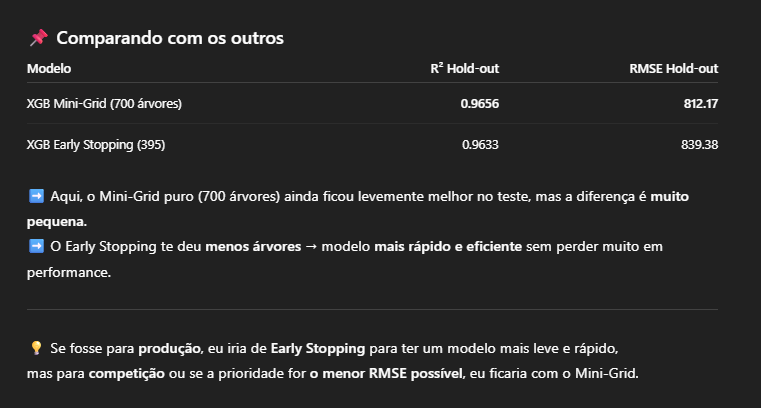

1) Treinar modelo final (Pipeline) e salvar

In [ ]:
import pandas as pd
import numpy as np
from joblib import dump
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb

# ----- dados e colunas (como você já usou) -----
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_ok = [c for c in cols if c in aS.columns]
aS = aS.dropna(subset=cols_ok).copy()
if set(['x','y','z']).issubset(aS.columns):
    aS = aS[(aS['x'] > 0) & (aS['y'] > 0) & (aS['z'] > 0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS.columns]

X = aS[num_cols + cat_cols]
y = aS['price'].astype(float)

# ----- preprocess + pipeline -----
preprocess = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

xgb_best = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    tree_method='hist',
    random_state=42,
    n_jobs=2,
    # Hiperparâmetros vencedores do seu mini-grid:
    colsample_bytree=0.9,
    learning_rate=0.03,
    max_depth=5,
    min_child_weight=3,
    n_estimators=700,
    reg_lambda=1.5,
    subsample=0.9
)

pipe_final = Pipeline(steps=[
    ('prep', preprocess),
    ('model', xgb_best)
])

# Treinar no conjunto TODO para maximizar performance final
pipe_final.fit(X, y)

# Salvar pipeline completo (inclui One-Hot e o modelo)
dump(pipe_final, 'diamonds_xgb_pipeline.joblib')
print("✅ Pipeline salvo em: diamonds_xgb_pipeline.joblib")


✅ Pipeline salvo em: diamonds_xgb_pipeline.joblib


Por que assim?

Salvar o Pipeline completo evita dor de cabeça: ao carregar, você passa um DataFrame com as mesmas colunas originais e ele já faz o One-Hot internamente antes de prever.

2) Importância das variáveis (tabela + gráfico)

Top 25 variáveis mais importantes:


,feature,importance
0,y,0.481647
1,carat,0.067204
2,clarity_IF,0.051864
3,clarity_VVS2,0.050072
4,x,0.047657
5,clarity_I1,0.046071
6,z,0.042512
7,clarity_SI2,0.031009
8,clarity_SI1,0.028468
9,clarity_VVS1,0.023451


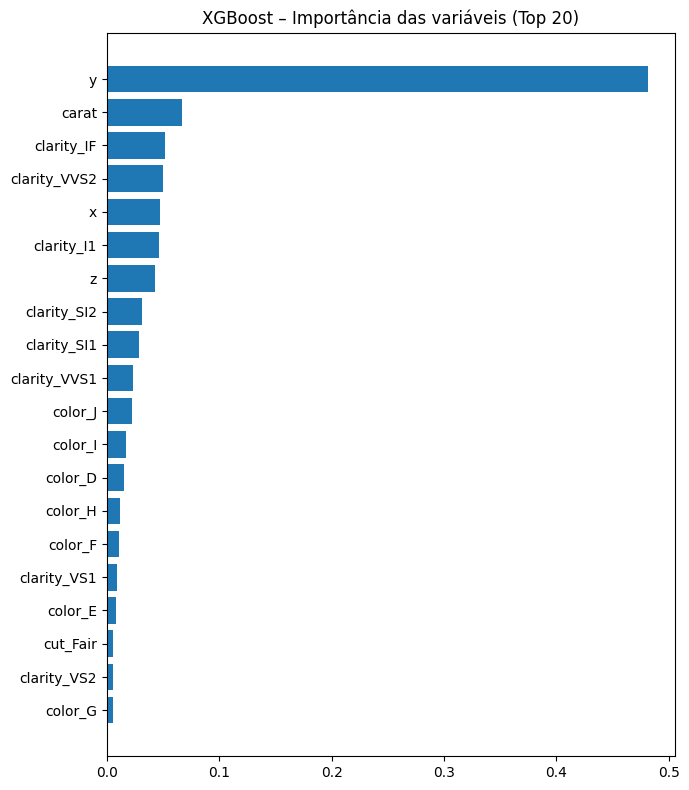

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extrair nomes das features pós One-Hot
ohe = pipe_final.named_steps['prep'].named_transformers_['cat']
cat_features = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols + cat_features

# Importâncias do XGB
importances = pipe_final.named_steps['model'].feature_importances_
fi = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi = fi.sort_values('importance', ascending=False).reset_index(drop=True)

print("Top 25 variáveis mais importantes:")
display(fi.head(25))

# Gráfico (top 20)
topk = 20
fi_top = fi.head(topk).iloc[::-1]  # invertido p/ barh
plt.figure(figsize=(7,8))
plt.barh(fi_top['feature'], fi_top['importance'])
plt.title('XGBoost – Importância das variáveis (Top 20)')
plt.tight_layout()
plt.show()


3) Carregar o modelo salvo e prever em novos dados

In [ ]:
from joblib import load

# Carregar
pipe_loaded = load('diamonds_xgb_pipeline.joblib')

# Exemplo com novos registros (mesmo esquema de colunas):
new_df = pd.DataFrame({
    'carat': [0.7, 1.2],
     'depth': [61.5, 62.0],
    'table': [56, 58],
     'x': [5.7, 6.8],
     'y': [5.6, 6.7],
    'z': [3.5, 4.2],
     'cut': ['Ideal', 'Very Good'],
     'color': ['G', 'H'],
     'clarity': ['VS2', 'SI1']
 })

preds = pipe_loaded.predict(new_df)
print(preds)

[2507.5747 5567.167 ]


1) Usando o Pipeline salvo (diamonds_xgb_pipeline.joblib)


Usage:   
  pip3 <command> [options]

no such option: -U


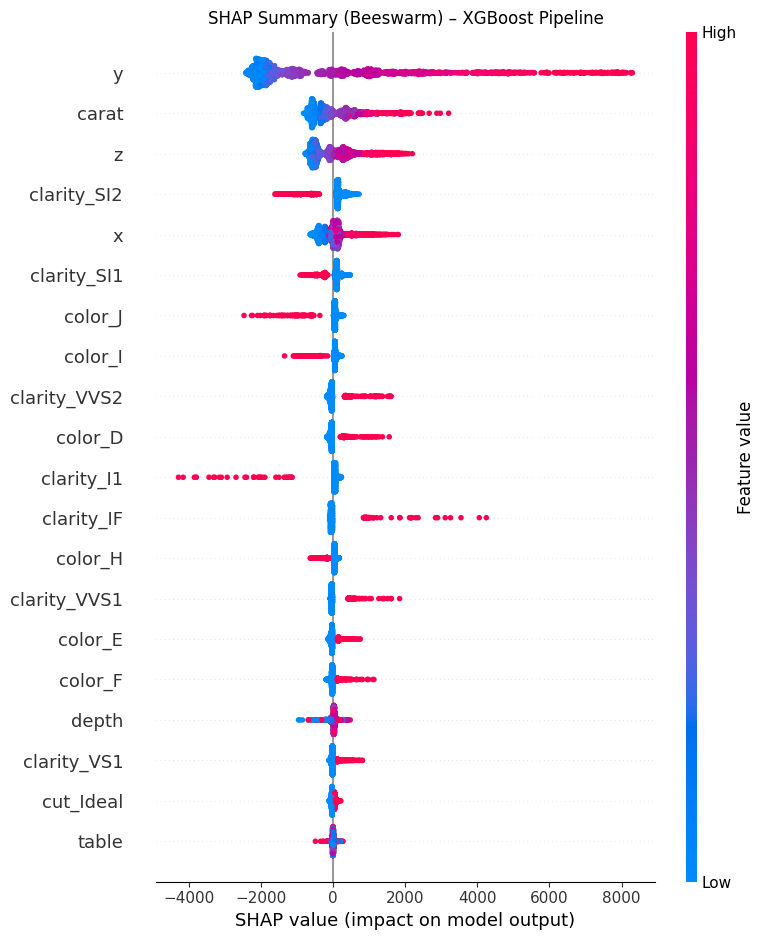

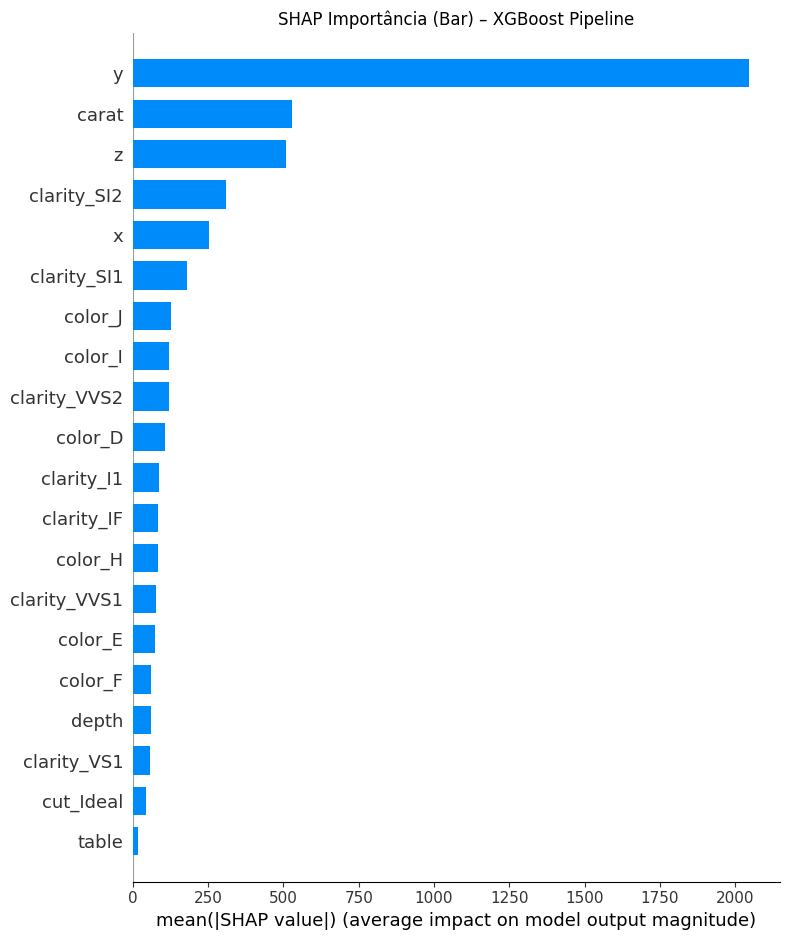

<Figure size 700x500 with 0 Axes>

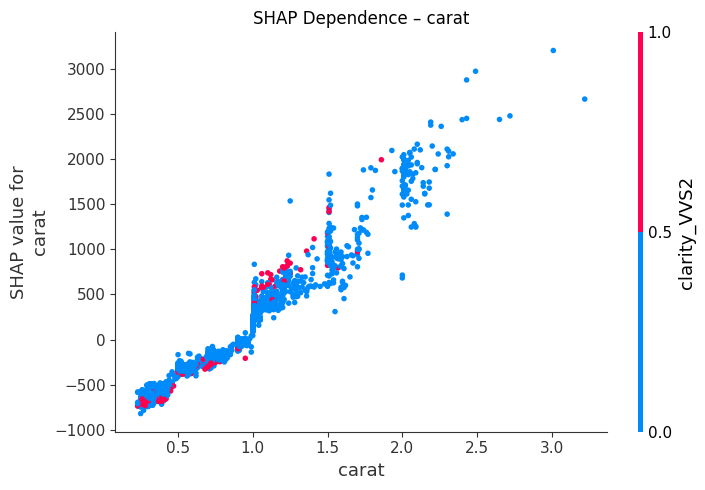

In [ ]:
# =========================
# 0) Instalação & Imports
# =========================
!pip -qU shap xgboost
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load

# (opcional no Colab, garante figuras no notebook)
%matplotlib inline

# =========================
# 1) Carregar pipeline e dados
# =========================
pipe_loaded = load('diamonds_xgb_pipeline.joblib')

# Se ainda não tiver X,y montados no ambiente:
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
cols_ok = [c for c in cols if c in aS.columns]
aS_ = aS.dropna(subset=cols_ok).copy()
if set(['x','y','z']).issubset(aS_.columns):
    aS_ = aS_[(aS_['x'] > 0) & (aS_['y'] > 0) & (aS_['z'] > 0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS_.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS_.columns]

X = aS_[num_cols + cat_cols]
y = aS_['price'].astype(float)

# =========================
# 2) Features pós One-Hot (nomes)
# =========================
prep = pipe_loaded.named_steps['prep']
ohe = prep.named_transformers_['cat']
cat_features = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols + cat_features

# =========================
# 3) Transformar X e amostrar p/ SHAP
# =========================
X_enc = prep.transform(X)
rng = np.random.RandomState(42)
idx = rng.choice(X_enc.shape[0], size=min(2000, X_enc.shape[0]), replace=False)
X_sample = X_enc[idx]

# =========================
# 4) Criar o Explainer e calcular SHAP values
# =========================
xgb_model = pipe_loaded.named_steps['model']

# Em versões novas, shap.Explainer funciona bem; se preferir, use TreeExplainer.
try:
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer(X_sample)
except Exception:
    explainer = shap.Explainer(xgb_model)
    shap_values = explainer(X_sample)

# =========================
# 5) Plots SHAP
# =========================

# 5.1 Summary (beeswarm)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names, show=False)
plt.title("SHAP Summary (Beeswarm) – XGBoost Pipeline")
plt.tight_layout()
plt.show()

# 5.2 Importância média absoluta (bar)
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Importância (Bar) – XGBoost Pipeline")
plt.tight_layout()
plt.show()

# 5.3 Dependence plot (ex.: carat)
feat = 'carat'  # troque por outra se quiser
feat_idx = feature_names.index(feat)
plt.figure(figsize=(7,5))
shap.dependence_plot(feat_idx, shap_values.values, X_sample, feature_names=feature_names, show=False)
plt.title(f"SHAP Dependence – {feat}")
plt.tight_layout()
plt.show()


Como ler os gráficos

Summary beeswarm: cada ponto é um registro; cor=valor da feature (alto/baixo), posição no eixo x = impacto na previsão (positivo/negativo).

Bar: importância média absoluta → ranking das features.

Dependence: mostra como mudar uma feature (ex.: carat) altera a previsão; a cor indica com qual outra feature ela mais interage.

Amostragem: para gráficos SHAP no Colab, usar ~1.000–2.000 linhas geralmente é suficiente e economiza memória.

Coerência de colunas: sempre use o mesmo esquema de pré-processamento do treino.

Interpretação prática:

carat deve aparecer como a feature mais impactante (impacto positivo grande).

Dummies de clarity, color, cut mostram como cada categoria puxa o preço para cima/baixo.

depth/table/x,y,z tendem a ter impacto menor, mas interações podem ser relevantes.

PDP (Partial Dependence Plots)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load

# Carregar pipeline já treinado
pipe_loaded = load('diamonds_xgb_pipeline.joblib')

# (Re)montar X e y a partir do seu DataFrame aS
cols = ['price','carat','depth','table','x','y','z','cut','color','clarity']
aS_ = aS.dropna(subset=[c for c in cols if c in aS.columns]).copy()
if {'x','y','z'}.issubset(aS_.columns):
    aS_ = aS_[(aS_['x']>0)&(aS_['y']>0)&(aS_['z']>0)].copy()

num_cols = [c for c in ['carat','depth','table','x','y','z'] if c in aS_.columns]
cat_cols = [c for c in ['cut','color','clarity'] if c in aS_.columns]

X = aS_[num_cols + cat_cols]
y = aS_['price'].astype(float)


1) PDP para variáveis numéricas (y, z, carat)

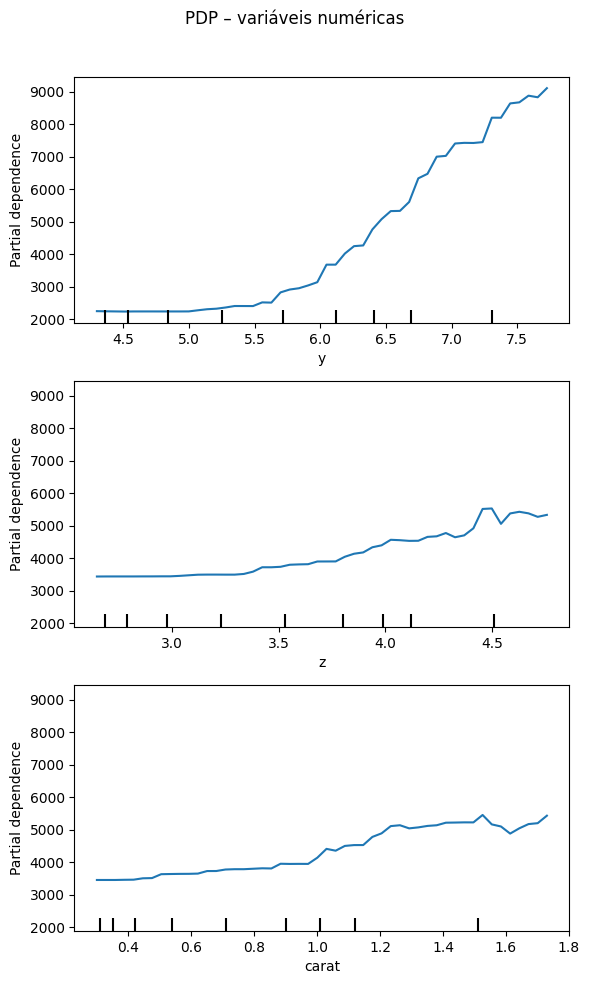

In [ ]:
# PDP usando a API atual do scikit-learn (com fallback para versões antigas)
features_num = [f for f in ['y','z','carat'] if f in X.columns]

try:
    from sklearn.inspection import PartialDependenceDisplay
    fig, ax = plt.subplots(len(features_num), 1, figsize=(6, 3.2*len(features_num)))
    PartialDependenceDisplay.from_estimator(
        pipe_loaded, X, features=features_num, kind='average', grid_resolution=50, ax=ax
    )
    plt.suptitle('PDP – variáveis numéricas', y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()
except Exception:
    # fallback para versões antigas
    from sklearn.inspection import plot_partial_dependence
    fig, ax = plt.subplots(len(features_num), 1, figsize=(6, 3.2*len(features_num)))
    plot_partial_dependence(pipe_loaded, X, features_num, grid_resolution=50, ax=ax)
    plt.suptitle('PDP – variáveis numéricas (API antiga)', y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()


Como ler

Curva ascendente → valores maiores aumentam a previsão do preço (ex.: carat).

Curva plana → pouco efeito na previsão.

Mudanças de inclinação → não linearidades (o impacto cresce/diminui conforme o valor).

2) PDP categórico para clarity (destacando SI2)

  clarity    mean_pred  delta_vs_base
0      I1  2374.471436   -1587.694580
3     SI2  3243.968994    -718.197021
2     SI1  3700.251465    -261.914551
5     VS2  4278.170898     316.004883
4     VS1  4501.982910     539.816895
7    VVS2  4999.093750    1036.927734
6    VVS1  5131.305176    1169.139160
1      IF  6118.274414    2156.108398


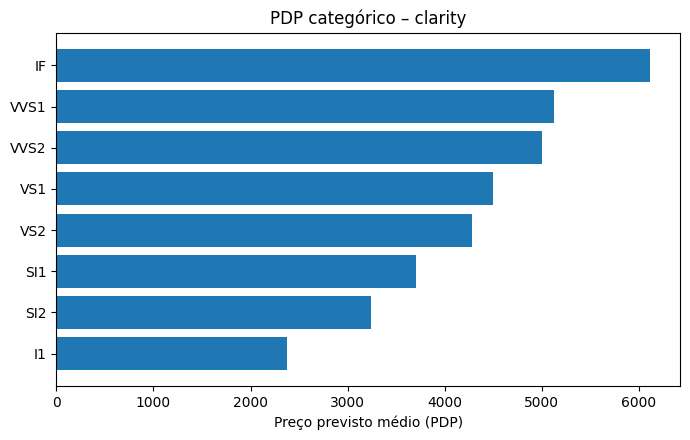

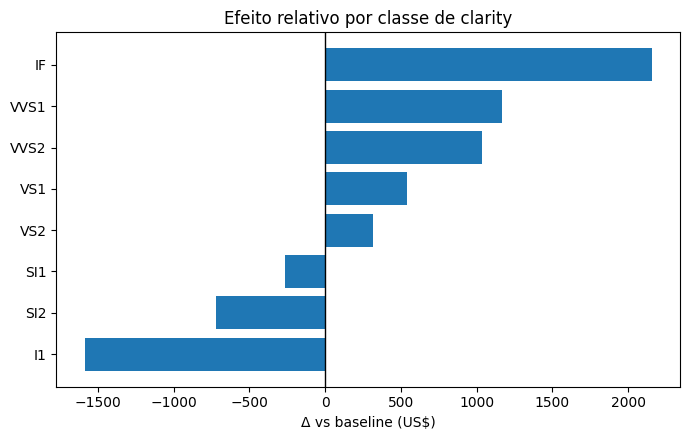

In [ ]:
# Amostra para acelerar (opcional)
rng = np.random.RandomState(42)
idx = rng.choice(len(X), size=min(5000, len(X)), replace=False)
X_base = X.iloc[idx].copy()

# Predição "baseline" (com as clarities originais dessas linhas)
base_pred = pipe_loaded.predict(X_base).mean()

# Lista de classes de clarity na ordem do encoder
prep = pipe_loaded.named_steps['prep']
ohe = prep.named_transformers_['cat']
clarity_classes = list(ohe.categories_[cat_cols.index('clarity')])

# Para cada classe, força a coluna 'clarity' a esse valor e mede o efeito médio
results = []
for c in clarity_classes:
    X_tmp = X_base.copy()
    X_tmp['clarity'] = c
    mean_pred = pipe_loaded.predict(X_tmp).mean()
    delta = mean_pred - base_pred   # efeito relativo à baseline
    results.append({'clarity': c, 'mean_pred': mean_pred, 'delta_vs_base': delta})

pdp_clarity = pd.DataFrame(results).sort_values('mean_pred', ascending=True)
print(pdp_clarity)

# Gráfico: previsão média por classe
plt.figure(figsize=(7,4.5))
plt.barh(pdp_clarity['clarity'], pdp_clarity['mean_pred'])
plt.xlabel('Preço previsto médio (PDP)')
plt.title('PDP categórico – clarity')
plt.tight_layout()
plt.show()

# (Opcional) gráfico do efeito relativo (delta vs baseline)
plt.figure(figsize=(7,4.5))
plt.barh(pdp_clarity['clarity'], pdp_clarity['delta_vs_base'])
plt.axvline(0, color='k', linewidth=1)
plt.xlabel('Δ vs baseline (US$)')
plt.title('Efeito relativo por classe de clarity')
plt.tight_layout()
plt.show()


3)PDP bivariado para checar interação (carat × y)



<Figure size 600x500 with 0 Axes>

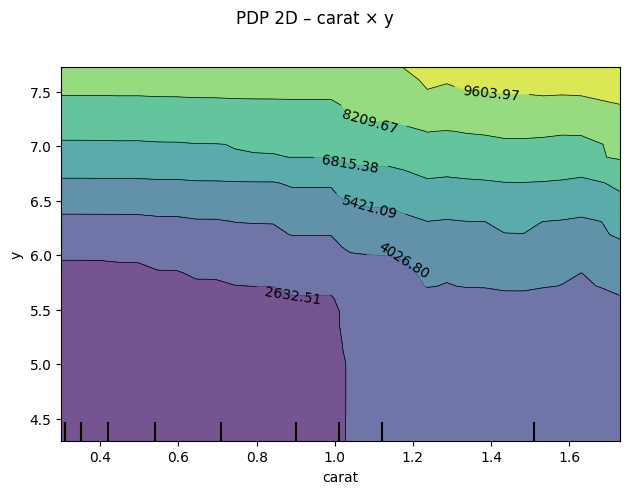

In [ ]:
try:
    from sklearn.inspection import PartialDependenceDisplay
    fig = plt.figure(figsize=(6,5))
    PartialDependenceDisplay.from_estimator(
        pipe_loaded, X, features=[('carat', 'y')], kind='average', grid_resolution=30
    )
    plt.suptitle('PDP 2D – carat × y', y=1.02)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("PDP 2D indisponível nesta versão do sklearn:", e)


Dicas finais

Não confundir PDP com causalidade: ele mostra o comportamento do modelo, não a “verdade do mundo”.

Use amostras (1k–5k linhas) para rodar rápido no Colab.

Para apresentação, combine: R²/RMSE, importância (bar SHAP), PDP de 2–3 variáveis-chave e 1 PDP 2D mostrando interação.

# **Conclusão**

O modelo XGBoost para precificação de diamantes indica que dimensões físicas (principalmente y – comprimento) têm muito mais impacto no preço previsto do que variáveis tradicionais como cor e até mesmo carat isolado. Além disso, existem interações claras entre medidas físicas, mostrando que o valor de mercado é mais influenciado pela combinação de tamanho e proporções do que por um único atributo.

* Insights mais Interessantes
1. Variáveis mais importantes

y (comprimento) é disparado o atributo mais relevante, com impacto médio muito maior que os demais (SHAP Bar).

z (profundidade) e carat aparecem em segundo plano, mas ainda relevantes.

Variáveis de cor e algumas categorias de clareza têm impacto baixo no modelo, sugerindo que, no conjunto analisado, fatores físicos pesam mais que estéticos.

2. Efeito isolado das variáveis numéricas (PDP 1D)

y: existe um ponto de inflexão por volta de 6,0 – acima disso, o preço cresce rapidamente, ultrapassando 10.000 US$ para valores acima de 7,5.

z: efeito mais sutil; há crescimento moderado até ~4,2, depois estabiliza.

carat: o aumento do peso sozinho traz incremento no preço, mas o efeito é menos acentuado que o de y.

3. Efeito das variáveis categóricas (Clarity)

Melhor clareza → maior preço: IF, VVS1 e VVS2 estão no topo do valor médio previsto.

SI2, destacada no seu gráfico, fica no grupo intermediário, mais valiosa que I1 mas bem abaixo das melhores categorias.

O efeito relativo mostra que IF pode valer cerca de +1.800 US acima da baseline, enquanto I1 retira aproximadamente -1.600 US do preço.

4. Interações importantes (PDP 2D: carat × y)

Para y baixo, aumentar carat pouco afeta o preço.

Para y alto, cada incremento em carat tem efeito exponencial no valor.

O topo de preço (zona amarela) ocorre quando y > 7,5 e carat > 1,5, indicando um nicho de diamantes grandes e longos que são muito valorizados.

Oportunidades de Uso

* Precificação: Em negociações, medir precisamente y e carat pode prever valor com boa precisão.

* Segmentação de produto: Modelos com y alto e carat alto devem ser posicionados como premium.

* Marketing: Clareza de topo (IF e VVS1) ainda agrega valor, mas não tanto quanto o tamanho; campanhas podem destacar dimensões.

* Controle de qualidade: Focar no corte e lapidação que maximizem y sem perder proporção pode ser mais lucrativo que apenas aumentar peso.

## Conclusões e Próximos Passos

Os resultados indicam que modelos mais complexos apresentam melhor desempenho preditivo.
